In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
# create a shortcut of the dataset to the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read perfumes data
perfumes = pd.read_csv("/content/drive/My Drive/final_perfume_data.csv", encoding='latin-1')

In [3]:
perfumes.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [4]:
# create a new column for the main scent
perfumes['Scent'] = perfumes['Notes'].str.split(',').str[0]

In [5]:
perfumes.head()

,Name,Brand,Description,Notes,Image URL,Scent
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...,Vanilla bean
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,Lavender
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...,Green yuzu
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...,tangerine
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,Bergamot


In [6]:
# decapitalize names of scents
perfumes['Scent'] = perfumes['Scent'].str.lower()

In [7]:
perfumes.shape

(2191, 6)

In [124]:
# create a new dataframe for scent counts before cleaning data
before = perfumes['Scent'].value_counts().reset_index()
before.columns = ['Scent', 'Count']
before.tail()

,Scent,Count
718,atlas cedarwood,1
719,absinthe (artemisia absinthum),1
720,texas cedarwood fraction orpur,1
721,palm tree leaves,1
722,exotic woods,1


In [126]:
# size of dataframe
before.shape

(723, 2)

Text(0.5, 1.0, '(Before Cleaning Data) Scent Count')

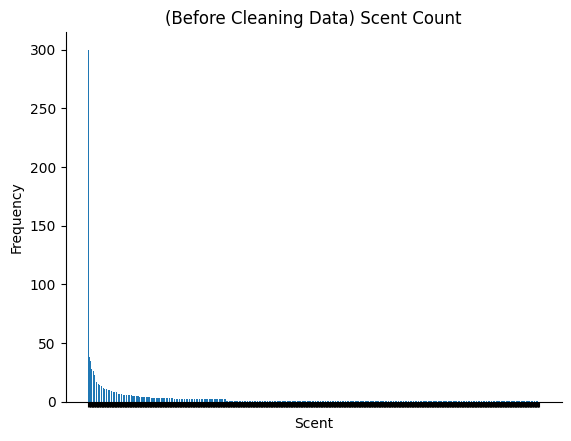

In [127]:
# create a chart to visualize all scents before cleaning data
from matplotlib import pyplot as plt
before.columns = ['Scent', 'Count']
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.bar(before['Scent'], before['Count'], width=0.7)
plt.ylabel("Frequency")
plt.gca().set_xticklabels([])
plt.xlabel("Scent")
plt.title("(Before Cleaning Data) Scent Count")

In [129]:
# count the number of scents and its occurence
counts = perfumes['Scent'].value_counts()

In [130]:
# disgard all perfumes with scents that is uncommon (for simplicity purpose)
filtered_perfumes = perfumes[perfumes['Scent'].isin(counts[counts > 10].index)]
filtered_perfumes = filtered_perfumes.reset_index(drop=True)

In [131]:
# create a new dataframe for all scent counts after cleaning data
after = filtered_perfumes['Scent'].value_counts().reset_index()
after.columns = ['Scent', 'Count']
after.tail()

,Scent,Count
26,tuberose,11
27,mint,11
28,patchouli,11
29,tobacco,11
30,leather,11


In [132]:
after.shape

(31, 2)

Text(0.5, 1.0, '(After Cleaning Data) Scent Count')

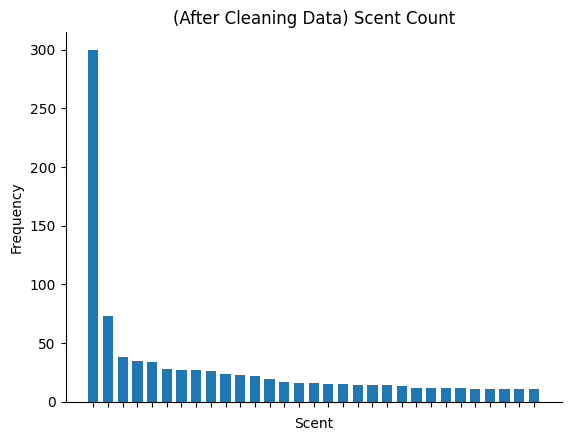

In [134]:
from matplotlib import pyplot as plt
after.columns = ['Scent', 'Count']
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.bar(after['Scent'], result['Count'], width=0.7)
plt.ylabel("Frequency")
plt.gca().set_xticklabels([])
plt.xlabel("Scent")
plt.title("(After Cleaning Data) Scent Count")

In [135]:
#
filtered_perfumes.head()

,Name,Brand,Description,Notes,Image URL,Scent
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,lavender
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,bergamot
7,Eshu Extrait,PRIN,"Eshu, the mischievous god of Yoruba legend, w...","Tobacco, hay, elemi, copaiba, olibanum, nutme...",https://static.luckyscent.com/images/products/...,tobacco
8,Saringkarn Extrait,PRIN,A taste of love and seduction. The value of l...,"Saffron, champaca, fir balsam, beeswax, amber...",https://static.luckyscent.com/images/products/...,saffron
13,L'Homme A La Rose Eau de Parfum,Maison Francis Kurkdjian,Francis Kurkdjian has a talent for making mas...,"Grapefruit, Damascene rose, amber woods accor...",https://static.luckyscent.com/images/products/...,grapefruit


In [ ]:
pd.set_option('display.max_rows', None)
filtered_perfumes['Scent'].value_counts()

In [73]:
filtered_perfumes.to_csv('/content/drive/My Drive/final_list.csv', index=False)

In [14]:
filtered_perfumes

,Name,Brand,Description,Notes,Image URL,Scent
0,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,lavender
1,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,bergamot
2,Eshu Extrait,PRIN,"Eshu, the mischievous god of Yoruba legend, w...","Tobacco, hay, elemi, copaiba, olibanum, nutme...",https://static.luckyscent.com/images/products/...,tobacco
3,Saringkarn Extrait,PRIN,A taste of love and seduction. The value of l...,"Saffron, champaca, fir balsam, beeswax, amber...",https://static.luckyscent.com/images/products/...,saffron
4,L'Homme A La Rose Eau de Parfum,Maison Francis Kurkdjian,Francis Kurkdjian has a talent for making mas...,"Grapefruit, Damascene rose, amber woods accor...",https://static.luckyscent.com/images/products/...,grapefruit
5,Rozu Eau de Parfum,Aesop,The beauty of Aesop fragrances lies in their ...,"Rose, shiso, guaiac",https://static.luckyscent.com/images/products/...,rose
6,Champs Lunaires Eau de Toilette,Rogue Perfumery,An intangible summer night; Moonlit fields of...,"Tuberose, White Rose Petals, Pomelo, Sandalwo...",https://static.luckyscent.com/images/products/...,tuberose
7,Prends-Moi Eau de Parfum,Isabey,Take me.It's a bold and forward statement in ...,"Bergamot, pink pepper, raspberry, rose, red s...",https://static.luckyscent.com/images/products/...,bergamot
8,Celestial Eau de Parfum,Electimuss,"Heavenly, divine and of the gods. Gazing to t...","Saffron, raspberry, black pepper, olibanum, I...",https://static.luckyscent.com/images/products/...,saffron
9,Amber Eau de Parfum,Rook Perfumes,"When we say we love amber scents, we don't ju...","saffron, smoke, incense, amber, maple, black ...",https://static.luckyscent.com/images/products/...,saffron


In [65]:
filtered_perfumes2 = filtered_perfumes[(filtered_perfumes['Scent'].str.strip() == 'rose') | (filtered_perfumes['Scent'].str.strip() == 'yuzu') | (filtered_perfumes['Scent'].str.strip() == 'sandalwood')]
filtered_perfumes2.head()

,Name,Brand,Description,Notes,Image URL,Scent
5,Rozu Eau de Parfum,Aesop,The beauty of Aesop fragrances lies in their ...,"Rose, shiso, guaiac",https://static.luckyscent.com/images/products/...,rose
23,Eau de Yuzu Eau de Toilette,PARFUMS DE NICOLAI,An authentic Japanese garden glows with the h...,"Yuzu, lemon leaf, juniper, grapefruit, gaiac,...",https://static.luckyscent.com/images/products/...,yuzu
59,Sahraa Oud Eau de Parfum,Fragrance du Bois,"Despite its desert inspiration, Sahraa Oud is...","rose, geranium, jasmine, moss, patchouli, san...",https://static.luckyscent.com/images/products/...,rose
76,Alchemico Eau de Parfum,Mazzolari,The Mazzolari line has always embraced dualit...,"Rose, cypress, pepper, incense, geranium, vet...",https://static.luckyscent.com/images/products/...,rose
82,Le Rose Eau de Parfum,Mazzolari,"Like the perfect cocktail, the perfect dress,...","Rose, Indian sandalwood, musk.",https://static.luckyscent.com/images/products/...,rose


In [19]:
row_count = len(filtered_perfumes2)

In [72]:
filtered_perfumes2.sample()

,Name,Brand,Description,Notes,Image URL,Scent
773,Santal Majuscule Eau de Parfum,Serge Lutens,Now that Santal Blanc has been shifted to the...,"Sandalwood, rose, cocoa, tonka bean",https://static.luckyscent.com/images/products/...,sandalwood
